## 第6章 缺失数据
#### 在接下来的两章中，会接触到数据预处理中比较麻烦的类型，即缺失数据和文本数据（尤其是混杂型文本）
#### Pandas在步入1.0后，对数据类型也做出了新的尝试，尤其是Nullable类型和String类型，了解这些可能在未来成为主流的新特性是必要的

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'joyful-pandas-master\data\table_missing.csv')
df.head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-


## 一、缺失观测及其类型
#### 1. 了解缺失信息
#### a.isna和notna方法
- 对Series 使用会返回布尔列表

In [5]:
df['Physics'].isna().head()

0    False
1    False
2    False
3     True
4    False
Name: Physics, dtype: bool

In [6]:
df['Physics'].notna().head()

0     True
1     True
2     True
3    False
4     True
Name: Physics, dtype: bool

- 对DataFrame使用会返回布尔表

In [7]:
df.isna().head()

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,False,False,True,False,False,False,True,False,False
1,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False
3,False,True,True,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False


- 但对于DataFrame我们更关心到底每列有多少缺失值

In [8]:
df.isna().sum()

School      0
Class       4
ID          6
Gender      7
Address     0
Height      0
Weight     13
Math        5
Physics     4
dtype: int64

- 此外，可以通过第1章中介绍的info函数查看缺失信息

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   School   35 non-null     object 
 1   Class    31 non-null     object 
 2   ID       29 non-null     float64
 3   Gender   28 non-null     object 
 4   Address  35 non-null     object 
 5   Height   35 non-null     int64  
 6   Weight   22 non-null     float64
 7   Math     30 non-null     float64
 8   Physics  31 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ KB


#### b.查看缺失值的所在行
- 以最后一列为例，挑出该列缺失值的行 

In [12]:
df[df['Physics'].isna()]    #筛选Physics是null 的行

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
13,S_1,C_3,1304.0,NaN,street_2,195,70.0,85.2,NaN
22,S_2,C_2,2203.0,M,street_4,155,91.0,73.8,NaN


#### c.挑选出所有非缺失值列
- 使用all就是全部非缺失值，如果是any就是至少有一个不是缺失值

In [13]:
df[df.notna().all(1)]  #全部非缺失值

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
12,S_1,C_3,1303.0,M,street_7,188,82.0,49.7,B
17,S_2,C_1,2103.0,M,street_4,157,61.0,52.5,B-
21,S_2,C_2,2202.0,F,street_7,194,77.0,68.5,B+
25,S_2,C_3,2301.0,F,street_4,157,78.0,72.3,B+
27,S_2,C_3,2303.0,F,street_7,190,99.0,65.9,C
28,S_2,C_3,2304.0,F,street_6,164,81.0,95.5,A-
29,S_2,C_3,2305.0,M,street_4,187,73.0,48.9,B


In [14]:
df[df.notna().any(1)]   #至少有一个不是缺失值

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
7,S_1,C_2,NaN,M,street_6,160,53.0,58.8,A+
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
9,S_1,C_2,1205.0,NaN,street_6,167,NaN,68.4,B-


#### 2.三种缺失符号
#### a.np.nan
- np.nan是一个麻烦的东西，首先它不等与任何东西，甚至不等于自己

In [15]:
np.nan == np.nan

False

In [16]:
np.nan ==0

False

In [17]:
np.nan == None

False

- 在用equals函数比较时，自动略过两侧全是np.nan的单元格，因此结果不会影响

In [18]:
df.equals(df)

True

- 其次，它在Numpy中的类型为浮点，由此导致数据集读入时，即使原来是整数的列，只要有缺失值就会变为浮点型

In [19]:
type(np.nan)

float

In [20]:
pd.Series([1,2,3]).dtype

dtype('int64')

In [21]:
pd.Series([1,np.nan,3]).dtype

dtype('float64')

- 此外，对于布尔类型的列表，如果是np.nan填充，那么它的值会自动变为True而不是False

In [4]:
pd.Series([1,np.nan,3],dtype='bool')

0    True
1    True
2    True
dtype: bool

- 但当修改一个布尔列表时，会改变列表类型，而不是赋值为True

In [5]:
s = pd.Series([True,False],dtype='bool')
s[1]=np.nan
s

0    1.0
1    NaN
dtype: float64

- 在所有的表格读取后，无论列是存放什么类型的数据，默认的缺失值全为np.nan类型
- 因此整型列转为浮点；而字符由于无法转化为浮点，因此只能归并为object类型（'O'），原来是浮点型的则类型不变

In [6]:
df['ID'].dtype

dtype('float64')

In [8]:
df['Math'].dtype

dtype('float64')

In [9]:
df['Class'].dtype

dtype('O')

#### b.None
- None比前者稍微好些，至少它会等于自身

In [10]:
None == None

True

- 修改布尔列表不会改变数据类型

In [11]:
s = pd.Series([True,False],dtype='bool')
s[0]=None
s

0    False
1    False
dtype: bool

In [12]:
s = pd.Series([1,0],dtype='bool')
s[0]=None
s

0    False
1    False
dtype: bool

- 在传入数值类型后，会自动变为np.nan

In [13]:
type(pd.Series([1,None])[1])

numpy.float64

- 只有当传入object类型是保持不动，几乎可以认为，除非人工命名None，它基本不会自动出现在Pandas中

In [14]:
type(pd.Series([1,None],dtype='O')[1])

NoneType

- 在使用equals函数时不会被略过，因此下面的情况下返回False

In [15]:
pd.Series([None]).equals(pd.Series([np.nan]))

False

#### c.NaT
- NaT是针对时间序列的缺失值，是Pandas的内置类型，可以完全看做时序版本的np.nan，与自己不等，且使用equals是也会被跳过

In [16]:
s_time = pd.Series([pd.Timestamp('20120101')]*5)
s_time

0   2012-01-01
1   2012-01-01
2   2012-01-01
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [17]:
s_time[2] = None
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [18]:
s_time[2] = np.nan
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [19]:
s_time[2] = pd.NaT
s_time

0   2012-01-01
1   2012-01-01
2          NaT
3   2012-01-01
4   2012-01-01
dtype: datetime64[ns]

In [20]:
type(s_time[2])

pandas._libs.tslibs.nattype.NaTType

In [21]:
s_time[2] == s_time[2]

False

In [22]:
s_time.equals(s_time)

True

In [23]:
s = pd.Series([True,False],dtype='bool')
s[1]=pd.NaT
s

0    True
1    True
dtype: bool

#### 3.Nullable类型与NA符号
- 这是Pandas在1.0新版本中引入的重大改变，其目的就是为了（在若干版本后）解决之前出现的混乱局面，统一缺失值处理方法

#### a.Nullable整形
- 对于该种类型而言，它与原来标记int上的符号区别在于首字母大写：'Int'

In [24]:
s_original = pd.Series([1, 2], dtype="int64")
s_original

0    1
1    2
dtype: int64

In [25]:
s_new = pd.Series([1, 2], dtype="Int64")
s_new

0    1
1    2
dtype: Int64

- 它的好处就在于，其中前面提到的三种缺失值都会被替换为统一的NA符号，且不改变数据类型

In [26]:
s_original[1] = np.nan
s_original

0    1.0
1    NaN
dtype: float64

In [27]:
s_new[1] = np.nan
s_new

0       1
1    <NA>
dtype: Int64

In [28]:
s_new[1] = None
s_new

0       1
1    <NA>
dtype: Int64

In [29]:
s_new[1] = pd.NaT
s_new

0       1
1    <NA>
dtype: Int64

#### b.Nullable布尔
- 对于该种类型而言，作用与上面的类似，记号为boolean

In [30]:
s_original = pd.Series([1, 0], dtype="bool")
s_original

0     True
1    False
dtype: bool

In [31]:
s_new = pd.Series([0, 1], dtype="boolean")
s_new

0    False
1     True
dtype: boolean

In [32]:
s_original[0] = np.nan
s_original

0    NaN
1    0.0
dtype: float64

In [33]:
s_original = pd.Series([1, 0], dtype="bool") #此处重新加一句是因为前面赋值改变了bool类型
s_original[0] = None
s_original

0    False
1    False
dtype: bool

In [34]:
s_new[0] = np.nan
s_new

0    <NA>
1    True
dtype: boolean

In [35]:
s_new[0] = None
s_new

0    <NA>
1    True
dtype: boolean

In [ ]:
s_new[0] = pd.NaT
s_new

- 需要注意的是，含有pd.NA的布尔列表在1.0.2之前的版本作为索引时会报错，这是一个之前的bug，现已经修复

In [36]:
s = pd.Series(['dog','cat'])
s[s_new]

1    cat
dtype: object

#### c.string类型
- 该类型是1.0的一大创新，目的之一就是为了区分开原本含糊不清的object类型，这里将简要地提及string，因为它是第7章的主题内容
- 它本质上也属于Nullable类型，因为并不会因为含有缺失而改变类型

In [37]:
s = pd.Series(['dog','cat'],dtype='string')
s

0    dog
1    cat
dtype: string

In [38]:
s[0] = np.nan
s

0    <NA>
1     cat
dtype: string

In [39]:
s[0] = None
s

0    <NA>
1     cat
dtype: string

In [40]:
s[0] = pd.NaT
s

0    <NA>
1     cat
dtype: string

- 此外，和object类型的一点重要区别就在于，在调用字符方法后，string类型返回的是Nullable类型，object则会根据缺失类型和数据类型而改变

In [41]:
s = pd.Series(["a", None, "b"], dtype="string")
s.str.count('a')

0       1
1    <NA>
2       0
dtype: Int64

In [42]:
s2 = pd.Series(["a", None, "b"], dtype="object")
s2.str.count("a")

0    1.0
1    NaN
2    0.0
dtype: float64

In [43]:
s.str.isdigit()

0    False
1     <NA>
2    False
dtype: boolean

In [44]:
s2.str.isdigit()

0    False
1     None
2    False
dtype: object

#### 4.NA的特性
#### a.逻辑运算
- 只需看该逻辑运算的结果是否依赖pd.NA的取值，如果依赖，则结果还是NA，如果不依赖，则直接计算结果

In [45]:
True | pd.NA

True

In [46]:
pd.NA | True

True

In [47]:
False | pd.NA

<NA>

In [48]:
False & pd.NA

False

In [49]:
True & pd.NA

<NA>

- 取值不明直接报错

In [ ]:
#bool(pd.NA)

#### b.算术运算和比较运算
- 这里只需记住除了下面两类情况，其他结果都是NA即可

In [50]:
pd.NA ** 0

1

In [51]:
1 ** pd.NA

1

- 其他情况：

In [52]:
pd.NA + 1

<NA>

In [53]:
"a" * pd.NA

<NA>

In [54]:
pd.NA == pd.NA

<NA>

In [55]:
pd.NA < 2.5

<NA>

In [56]:
np.log(pd.NA)

<NA>

In [57]:
np.add(pd.NA, 1)

<NA>

#### 5. convert_dtypes方法
- 这个函数的功能往往就是在读取数据时，就把数据列转为Nullable类型，是1.0的新函数

In [59]:
pd.read_csv(r'joyful-pandas-master\data\table_missing.csv')

,School,Class,ID,Gender,Address,Height,Weight,Math,Physics
0,S_1,C_1,NaN,M,street_1,173,NaN,34.0,A+
1,S_1,C_1,NaN,F,street_2,192,NaN,32.5,B+
2,S_1,C_1,1103.0,M,street_2,186,NaN,87.2,B+
3,S_1,NaN,NaN,F,street_2,167,81.0,80.4,NaN
4,S_1,C_1,1105.0,NaN,street_4,159,64.0,84.8,A-
5,S_1,C_2,1201.0,M,street_5,159,68.0,97.0,A-
6,S_1,C_2,1202.0,F,street_4,176,94.0,63.5,B-
7,S_1,C_2,NaN,M,street_6,160,53.0,58.8,A+
8,S_1,C_2,1204.0,F,street_5,162,63.0,33.8,NaN
9,S_1,C_2,1205.0,NaN,street_6,167,NaN,68.4,B-


In [60]:
pd.read_csv(r'joyful-pandas-master\data\table_missing.csv').convert_dtypes().dtypes

School      string
Class       string
ID           Int64
Gender      string
Address     string
Height       Int64
Weight       Int64
Math       float64
Physics     string
dtype: object

## 二、缺失数据的运算与分组
#### 1.加号与乘号规则
- 使用加法时，缺失值为0

In [61]:
s = pd.Series([2,3,np.nan,4])
s.sum()

9.0

- 使用乘法时，缺失值为1

In [62]:
s.prod()

24.0

- 使用累计函数时，缺失值自动略过

In [63]:
s.cumsum()

0    2.0
1    5.0
2    NaN
3    9.0
dtype: float64

In [64]:
s.cumprod()

0     2.0
1     6.0
2     NaN
3    24.0
dtype: float64

In [65]:
s.pct_change()

0         NaN
1    0.500000
2    0.000000
3    0.333333
dtype: float64

#### 2.groupby方法中的缺失值
- 自动忽略为缺失值的组

In [66]:
df_g = pd.DataFrame({'one':['A','B','C','D',np.nan],'two':np.random.randn(5)})
df_g

,one,two
0,A,-1.914655
1,B,-1.387924
2,C,0.627509
3,D,-0.682484
4,NaN,0.453072


In [67]:
df_g.groupby('one').groups

{'A': Int64Index([0], dtype='int64'),
 'B': Int64Index([1], dtype='int64'),
 'C': Int64Index([2], dtype='int64'),
 'D': Int64Index([3], dtype='int64')}

## 三、填充与剔除
#### 1. fillna方法
#### a.值填充与前后向填充（分别与ffill方法和bfill方法等价）

In [68]:
df['Physics'].fillna('missing').head()

0         A+
1         B+
2         B+
3    missing
4         A-
Name: Physics, dtype: object

In [69]:
df['Physics'].fillna(method='ffill').head()

0    A+
1    B+
2    B+
3    B+
4    A-
Name: Physics, dtype: object

In [70]:
df['Physics'].fillna(method='backfill').head()

0    A+
1    B+
2    B+
3    A-
4    A-
Name: Physics, dtype: object

#### b.填充中的对齐特性

In [71]:
df_f = pd.DataFrame({'A':[1,3,np.nan],'B':[2,4,np.nan],'C':[3,5,np.nan]})
df_f.fillna(df_f.mean())

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,4.0


- 返回的结果中没有C，根据对齐特点不会被填充

In [72]:
df_f.fillna(df_f.mean()[['A','B']])

,A,B,C
0,1.0,2.0,3.0
1,3.0,4.0,5.0
2,2.0,3.0,NaN


#### 2. dropna方法
#### a.axis参数

In [73]:
df_d = pd.DataFrame({'A':[np.nan,np.nan,np.nan],'B':[np.nan,3,2],'C':[3,2,1]})
df_d

,A,B,C
0,NaN,NaN,3
1,NaN,3.0,2
2,NaN,2.0,1


In [74]:
df_d.dropna(axis=0)

,A,B,C


In [75]:
df_d.dropna(axis=1)

,C
0,3
1,2
2,1


#### b.how参数（可以选all或者any，表示全为缺失去除和存在缺失去除）

In [76]:
df_d.dropna(axis=1,how='all')

,B,C
0,NaN,3
1,3.0,2
2,2.0,1


#### c.subset参数（即在某一组列范围中搜索缺失值）

In [77]:
df_d.dropna(axis=0,subset=['B','C'])

,A,B,C
1,NaN,3.0,2
2,NaN,2.0,1


## 四、插值（interpolation）
#### 1. 线性插值
#### a.索引无关的线性插值
- 默认状态下，interpolate会对缺失的值进行线性插值

In [78]:
s = pd.Series([1,10,15,-5,-2,np.nan,np.nan,28])
s

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     NaN
6     NaN
7    28.0
dtype: float64

In [79]:
s.interpolate()

0     1.0
1    10.0
2    15.0
3    -5.0
4    -2.0
5     8.0
6    18.0
7    28.0
dtype: float64

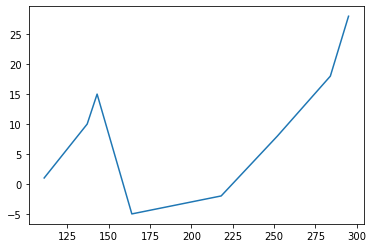

In [85]:
s.interpolate().plot()

- 此时的插值与索引无关

In [82]:
s.index = np.sort(np.random.randint(50,300,8))
s.interpolate()
#值不变

111     1.0
137    10.0
143    15.0
164    -5.0
218    -2.0
252     8.0
284    18.0
295    28.0
dtype: float64

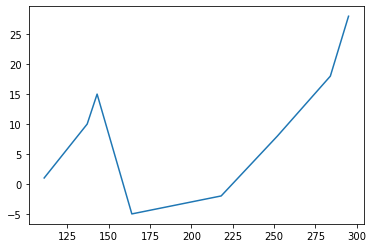

In [86]:
s.interpolate().plot()
#后面三个点不是线性的（如果几乎为线性函数，请重新运行上面的一个代码块，这是随机性导致的）

#### b.与索引有关的插值
- method中的index和time选项可以使插值线性地依赖索引，即插值为索引的线性函数

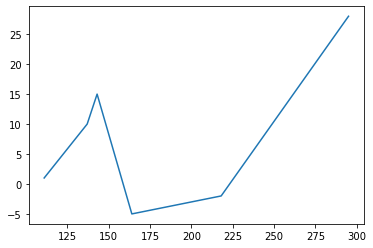

In [87]:
s.interpolate(method='index').plot()
#可以看到与上面的区别

- 如果索引是时间，那么可以按照时间长短插值，对于时间序列将在第9章详细介绍

In [84]:
s_t = pd.Series([0,np.nan,10]
        ,index=[pd.Timestamp('2012-05-01'),pd.Timestamp('2012-05-07'),pd.Timestamp('2012-06-03')])
s_t

2012-05-01     0.0
2012-05-07     NaN
2012-06-03    10.0
dtype: float64

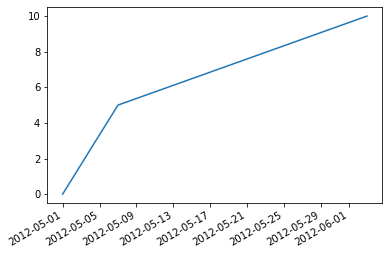

In [88]:
s_t.interpolate().plot()

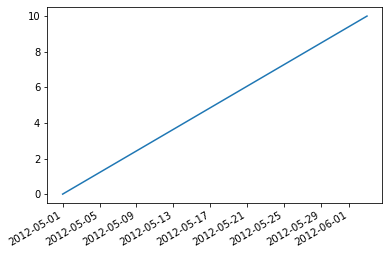

In [89]:
s_t.interpolate(method='time').plot()

#### 2. 高级插值方法
- 此处的高级指的是与线性插值相比较，例如样条插值、多项式插值、阿基玛插值等（需要安装Scipy）
- 关于这部分仅给出一个官方的例子，因为插值方法是数值分析的内容，而不是Pandas中的基本知识：

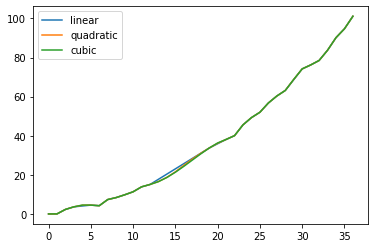

In [97]:
ser = pd.Series(np.arange(1, 10.1, .25) ** 2 + np.random.randn(37))
missing = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[missing] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

#### 3. interpolate中的限制参数
#### a.limit表示最多插入多少个

In [92]:
s = pd.Series([1,np.nan,np.nan,np.nan,5])
s.interpolate(limit=2)

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

#### b.limit_direction表示插值方向，可选forward,backward,both，默认前向

In [93]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_direction='backward')

0    1.0
1    1.0
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

#### c.limit_area表示插值区域，可选inside,outside，默认None¶

In [94]:
s = pd.Series([np.nan,np.nan,1,np.nan,np.nan,np.nan,5,np.nan,np.nan,])
s.interpolate(limit_area='inside')

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    NaN
8    NaN
dtype: float64

## 五、问题与练习
#### 1.问题

【问题一】 如何删除缺失值占比超过25%的列？

#### 思路：
- 1.筛选出缺失值占比超过25%的列
- 2.删除符合条件的列

#### 实现：

In [22]:
df = pd.DataFrame([[0,1,2,3,4,5,],[0,None,2,3,None,6],[None,None,2,3,None,None],[0,None,None,2,3,0],[0,1,2,3,None,5],[0,1,2,None,3,4]])
#df
dfpercent=df.isna().sum()/df.shape[0] >0.25
#dfpercent
dfresult=df.drop(df.columns[dfpercent],axis=1)
dfresult

,0,2,3,5
0,0.0,2.0,3.0,5.0
1,0.0,2.0,3.0,6.0
2,NaN,2.0,3.0,NaN
3,0.0,NaN,2.0,0.0
4,0.0,2.0,3.0,5.0
5,0.0,2.0,NaN,4.0


【问题二】 什么是Nullable类型？请谈谈为什么要引入这个设计？

#### 定义：
- Nullable类型是指将三种缺失值np.nan、None、NaT替换为统一的NA符号，且不改变数据类型。

#### 意义：
- 解决NaN,None与NaT三种缺失值在功能和类型上的混乱，统一缺失值处理方法。

【问题三】 对于一份有缺失值的数据，可以采取哪些策略或方法深化对它的了解？

#### 答案 ：
- 1）首先统计整体数据以及每列数据的缺失值比例，了解数据缺失值的占比情况，根据占比确定整体影响程度大小；
- 2）寻找缺失值数据的特征：某类数据、某相关数据、或随机数据，根据缺失值特征确定缺失值该如何处理；
- 3）做完前面两步后，最终对缺失值做相应的处理或不做处理。

#### 2.练习

【练习一】现有一份虚拟数据集，列类型分别为string/浮点/整型，请解决如下问题：

（a）请以列类型读入数据，并选出C为缺失值的行。

（b）现需要将A中的部分单元转为缺失值，单元格中的最小转换概率为25%，且概率大小与所在行B列单元的值成正比。

In [3]:
pd.read_csv(r'joyful-pandas-master\data\Missing_data_one.csv').head()

,A,B,C
0,not_NaN,0.922,4.0
1,not_NaN,0.700,NaN
2,not_NaN,0.503,8.0
3,not_NaN,0.938,4.0
4,not_NaN,0.952,10.0


#### （a）答案：

In [19]:
print('C列为缺失值的行：')
df=pd.read_csv(r'joyful-pandas-master\data\Missing_data_one.csv')
df_c= df[df['C'].isna()] 
df_c

C列为缺失值的行：


,A,B,C
1,not_NaN,0.700,NaN
5,not_NaN,0.972,NaN
11,not_NaN,0.736,NaN
19,not_NaN,0.684,NaN
21,not_NaN,0.913,NaN


#### (b)答案：
- 思路：说实话，没看懂，是要把A 列的部分数据转化为Null ?和B 列成正比是怎么求？我不会，我再想想

【练习二】 现有一份缺失的数据集，记录了36个人来自的地区、身高、体重、年龄和工资，请解决如下问题：

（a）统计各列缺失的比例并选出在后三列中至少有两个非缺失值的行。

（b）请结合身高列和地区列中的数据，对体重进行合理插值。

In [98]:
pd.read_csv(r'joyful-pandas-master\data\Missing_data_two.csv').head()

,编号,地区,身高,体重,年龄,工资
0,1,A,157.50,NaN,47.0,15905.0
1,2,B,202.00,91.80,25.0,NaN
2,3,C,169.09,62.18,NaN,NaN
3,4,A,166.61,59.95,77.0,5434.0
4,5,B,185.19,NaN,62.0,4242.0


#### （a）答案：
- 1) 统计各列缺失值的比例：

In [13]:
print('各列缺失值的比例：')
dfinfo =pd.read_csv(r'joyful-pandas-master\data\Missing_data_two.csv')
dfPP=dfinfo.isna().sum()/dfinfo.shape[0]
dfPP

各列缺失值的比例：


编号    0.000000
地区    0.000000
身高    0.000000
体重    0.222222
年龄    0.250000
工资    0.222222
dtype: float64

- 2)后三列中至少有两个非缺失值的行

In [20]:
print('后三列中至少有两个非缺失值的行：')
df1=dfinfo[dfinfo[['体重','年龄','工资']].isna().sum(1)<=1]
df1

后三列中至少有两个非缺失值的行：


,编号,地区,身高,体重,年龄,工资
0,1,A,157.50,NaN,47.0,15905.0
1,2,B,202.00,91.80,25.0,NaN
3,4,A,166.61,59.95,77.0,5434.0
4,5,B,185.19,NaN,62.0,4242.0
5,6,A,187.13,78.42,55.0,13959.0
6,7,C,163.81,57.43,43.0,6533.0
7,8,A,183.80,75.42,48.0,19779.0
8,9,B,179.67,71.70,65.0,8608.0
9,10,C,186.08,77.47,65.0,12433.0
10,11,B,163.41,57.07,NaN,6495.0


#### （b）答案:

In [23]:
print('体重按规则插值结果：')
df_b=pd.read_csv(r'joyful-pandas-master\data\Missing_data_two.csv')
for part,group in df_b.groupby('地区'):
    df_b.loc[group.index,'体重'] = group[['身高','体重']].sort_values(by='身高').interpolate()['体重']
print(df_b)

体重按规则插值结果：
    编号 地区      身高         体重    年龄       工资
0    1  A  157.50  53.580000  47.0  15905.0
1    2  B  202.00  91.800000  25.0      NaN
2    3  C  169.09  62.180000   NaN      NaN
3    4  A  166.61  59.950000  77.0   5434.0
4    5  B  185.19  81.750000  62.0   4242.0
5    6  A  187.13  78.420000  55.0  13959.0
6    7  C  163.81  57.430000  43.0   6533.0
7    8  A  183.80  75.420000  48.0  19779.0
8    9  B  179.67  71.700000  65.0   8608.0
9   10  C  186.08  77.470000  65.0  12433.0
10  11  B  163.41  57.070000   NaN   6495.0
11  12  A  202.56  92.300000   NaN      NaN
12  13  C  177.37  68.785000  79.0      NaN
13  14  B  175.99  68.390000   NaN  13130.0
14  15  C  199.11  89.200000   NaN      NaN
15  16  A  165.68  59.296667  46.0  13683.0
16  17  B  166.48  59.830000  31.0  17673.0
17  18  C  191.62  82.460000   NaN  12447.0
18  19  A  172.83  65.550000  23.0  13768.0
19  20  B  156.99  51.290000  62.0   3054.0
20  21  C  200.22  90.200000  41.0      NaN
21  22  A  154.63  49